In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
num_records = 1000
regions = ['North', 'South', 'East', 'West']
products = ['Firecrackers', 'Sweets', 'Decorations', 'Apparel']

# Generate random dates within Diwali season (October to November)
np.random.seed(0)  # For reproducibility
start_date = pd.Timestamp('2023-10-01')
end_date = pd.Timestamp('2023-11-30')
dates = pd.date_range(start=start_date, end=end_date, freq='D')
date_range = np.random.choice(dates, num_records)

# Generate random regions and products
region_choices = np.random.choice(regions, num_records)
product_choices = np.random.choice(products, num_records)

# Generate random sales values
sales_values = np.random.randint(500, 5000, num_records)

# Create DataFrame
data = pd.DataFrame({
    'Date': date_range,
    'Region': region_choices,
    'Product': product_choices,
    'Sales': sales_values
})

# Save to CSV (optional)
print(data.head())
data.to_csv('D:/diwali_sales_data.csv', index=False)



SyntaxError: invalid syntax (numpy.py, line 1)

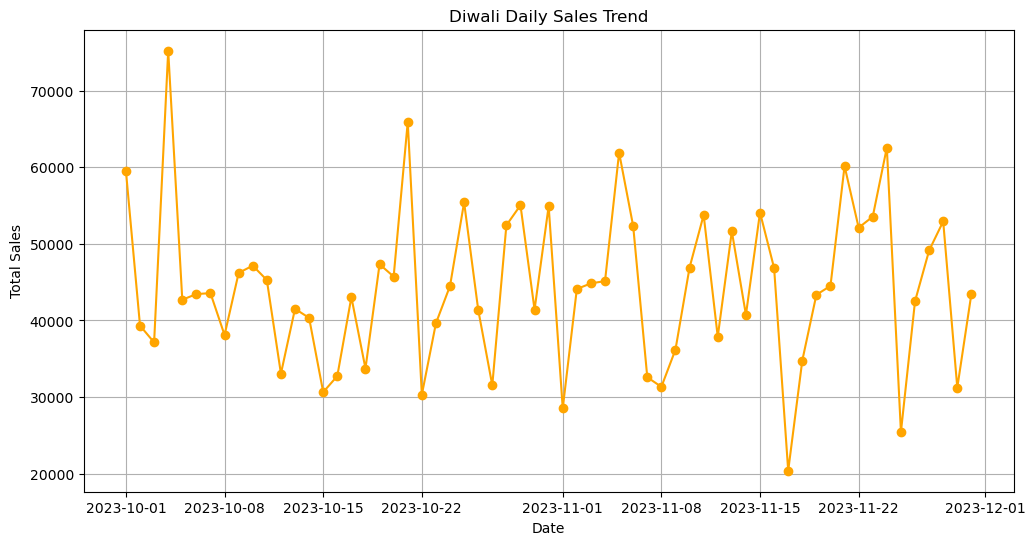

In [4]:
#Q1. Group by date and sum sales(SERIES PLOT)
daily_sales = data.groupby('Date')['Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='orange')
plt.title('Diwali Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()




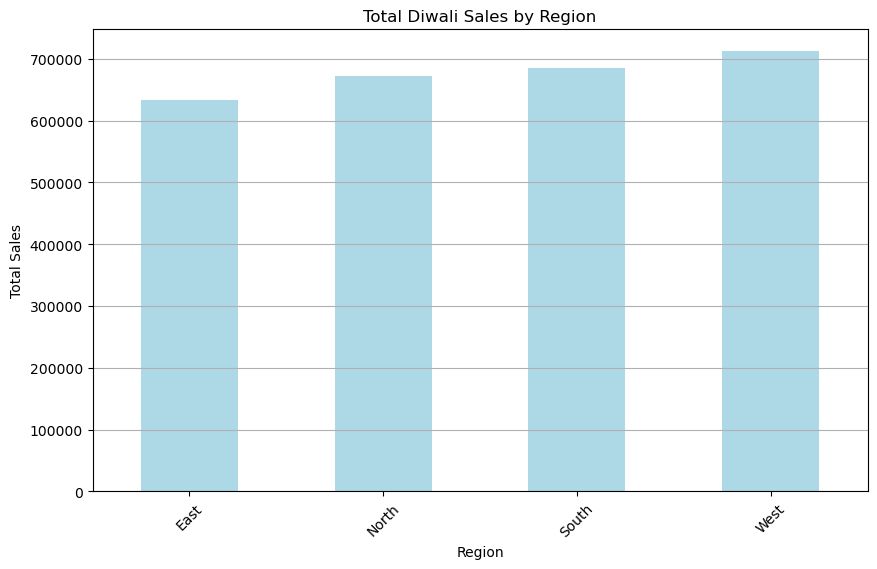

In [5]:
#Q2.. Group by region and sum sales(BAR PLOT)
sales_by_region = data.groupby('Region')['Sales'].sum()

plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='bar', color='lightblue')
plt.title('Total Diwali Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


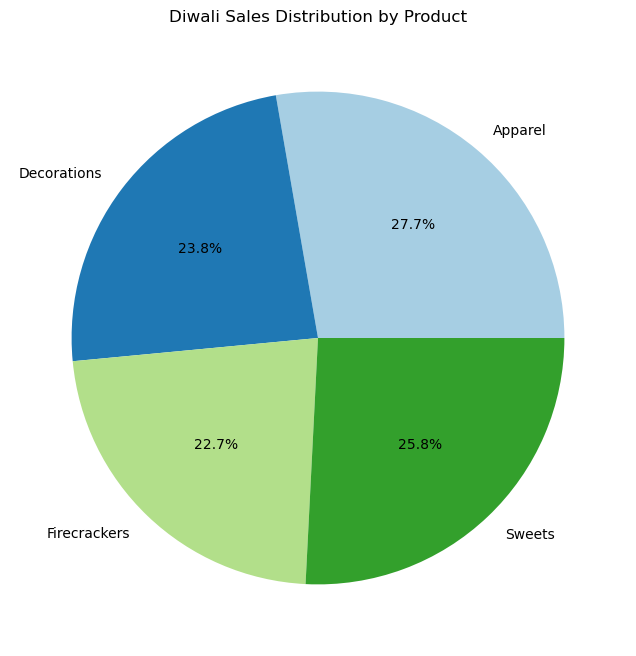

In [6]:
#Q3.Group by product and sum sales(PIE CHART)
sales_by_product = data.groupby('Product')['Sales'].sum()

plt.figure(figsize=(8, 8))
sales_by_product.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired(np.arange(len(products))))
plt.title('Diwali Sales Distribution by Product')
plt.ylabel('')  # Remove y-label
plt.show()


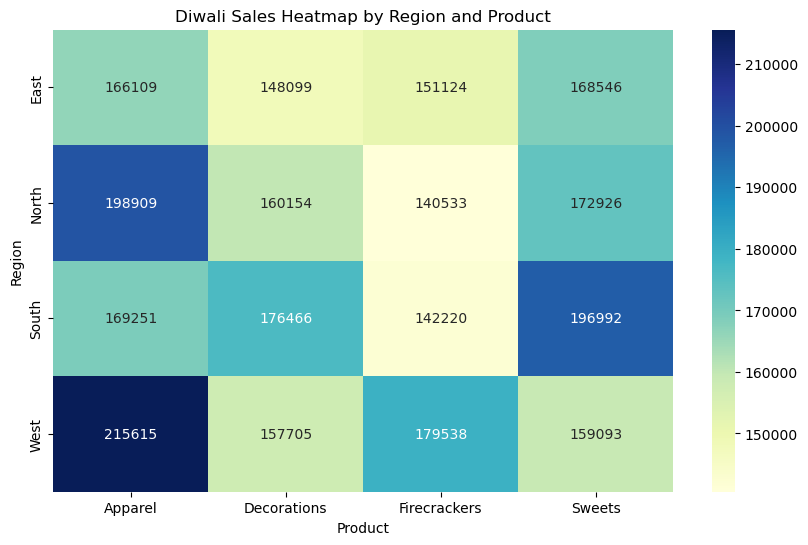

In [7]:
#Q4.Pivot table for heatmap
pivot_table = data.pivot_table(index='Region', columns='Product', values='Sales', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Diwali Sales Heatmap by Region and Product')
plt.show()


<Figure size 1200x600 with 0 Axes>

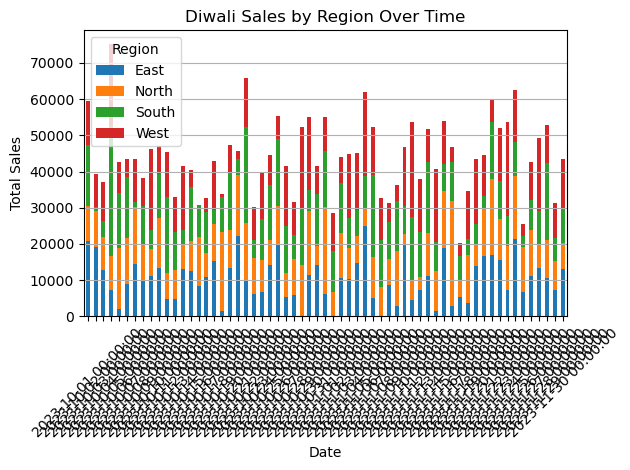

In [8]:
#Q5. Pivot table for stacked bar plot
pivot_table = data.pivot_table(index='Date', columns='Region', values='Sales', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Diwali Sales by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


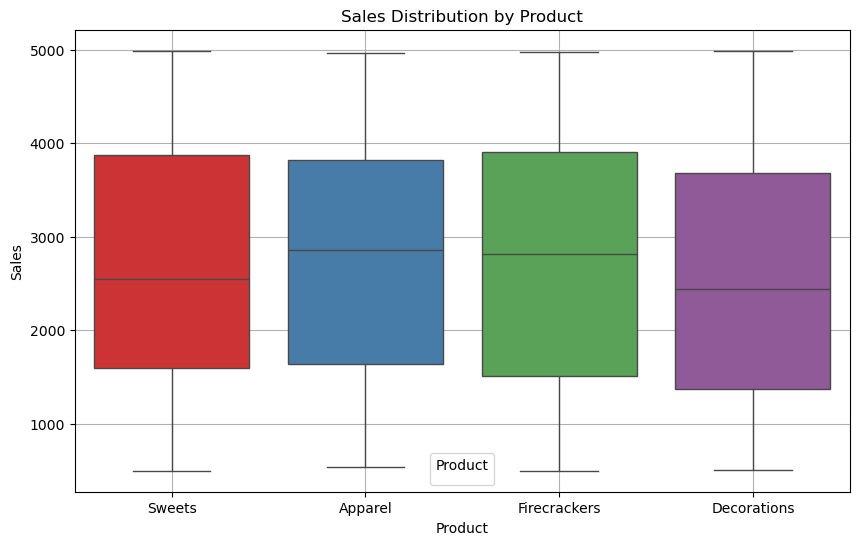

In [9]:
#Q6. Box plot for sales distribution 
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 6))

# Create the boxplot with hue
sns.boxplot(x='Product', y='Sales', data=data, hue='Product', palette='Set1')

# Add titles and labels
plt.title('Sales Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Sales')

# Add grid lines for better readability
plt.grid(True)

# Adjust legend to handle multiple hues
plt.legend(title='Product')

# Show the plot
plt.show()

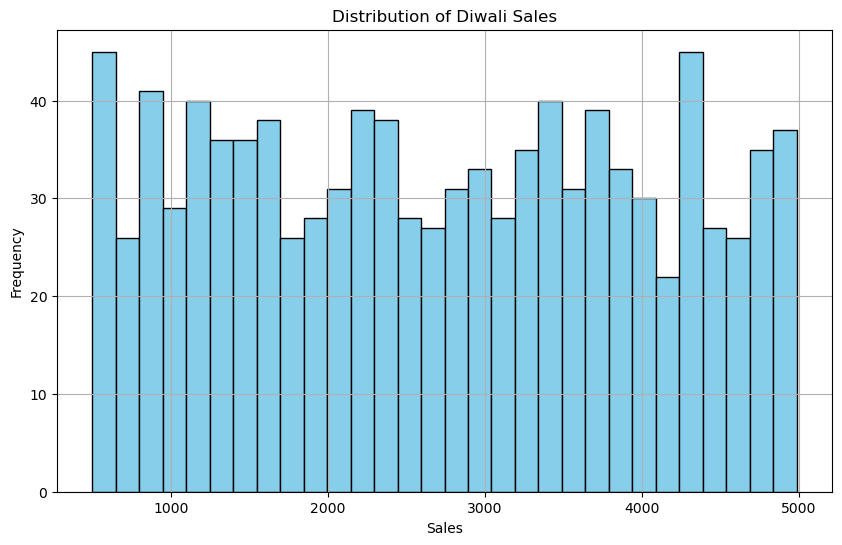

In [10]:
#Q7.Histogram chart for the Distribution of sales value
plt.figure(figsize=(10, 6))
plt.hist(data['Sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Diwali Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

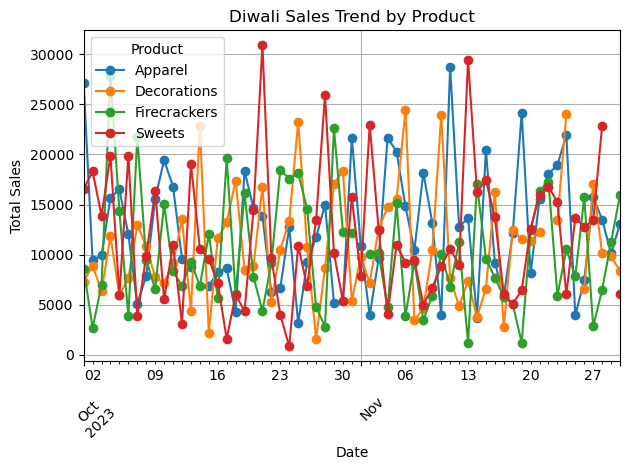

In [11]:
#Q8. Group by date and product, then sum sales(LINE CHART)
sales_by_date_product = data.groupby(['Date', 'Product'])['Sales'].sum().unstack()

plt.figure(figsize=(12, 6))
sales_by_date_product.plot(kind='line', marker='o')
plt.title('Diwali Sales Trend by Product')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


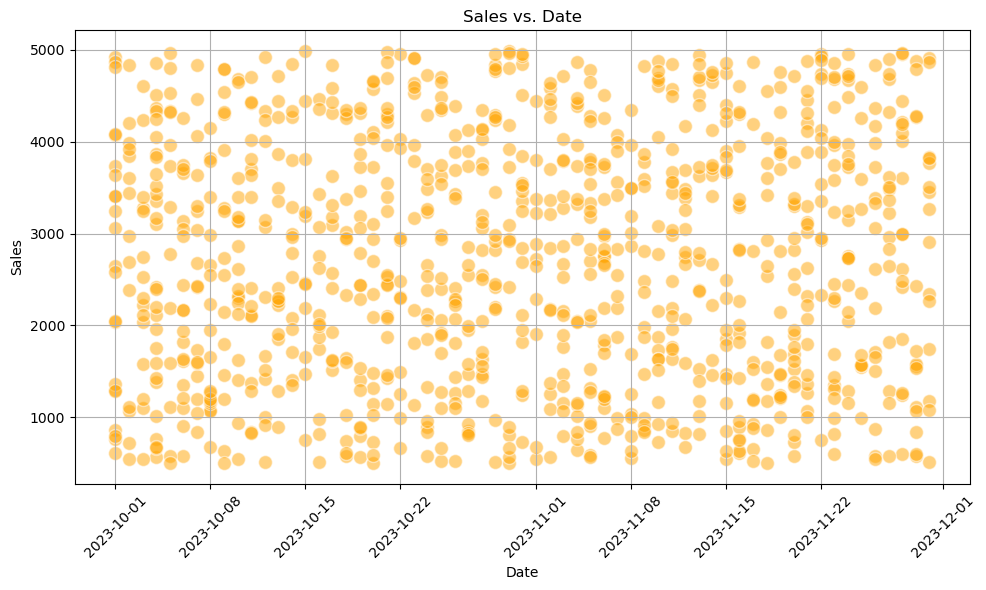

In [12]:
#Q9.Relationship between sales and data (SCATTER CHART)
plt.figure(figsize=(10, 6))
plt.scatter(data['Date'], data['Sales'], alpha=0.5, c='orange', edgecolors='w', s=100)
plt.title('Sales vs. Date')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


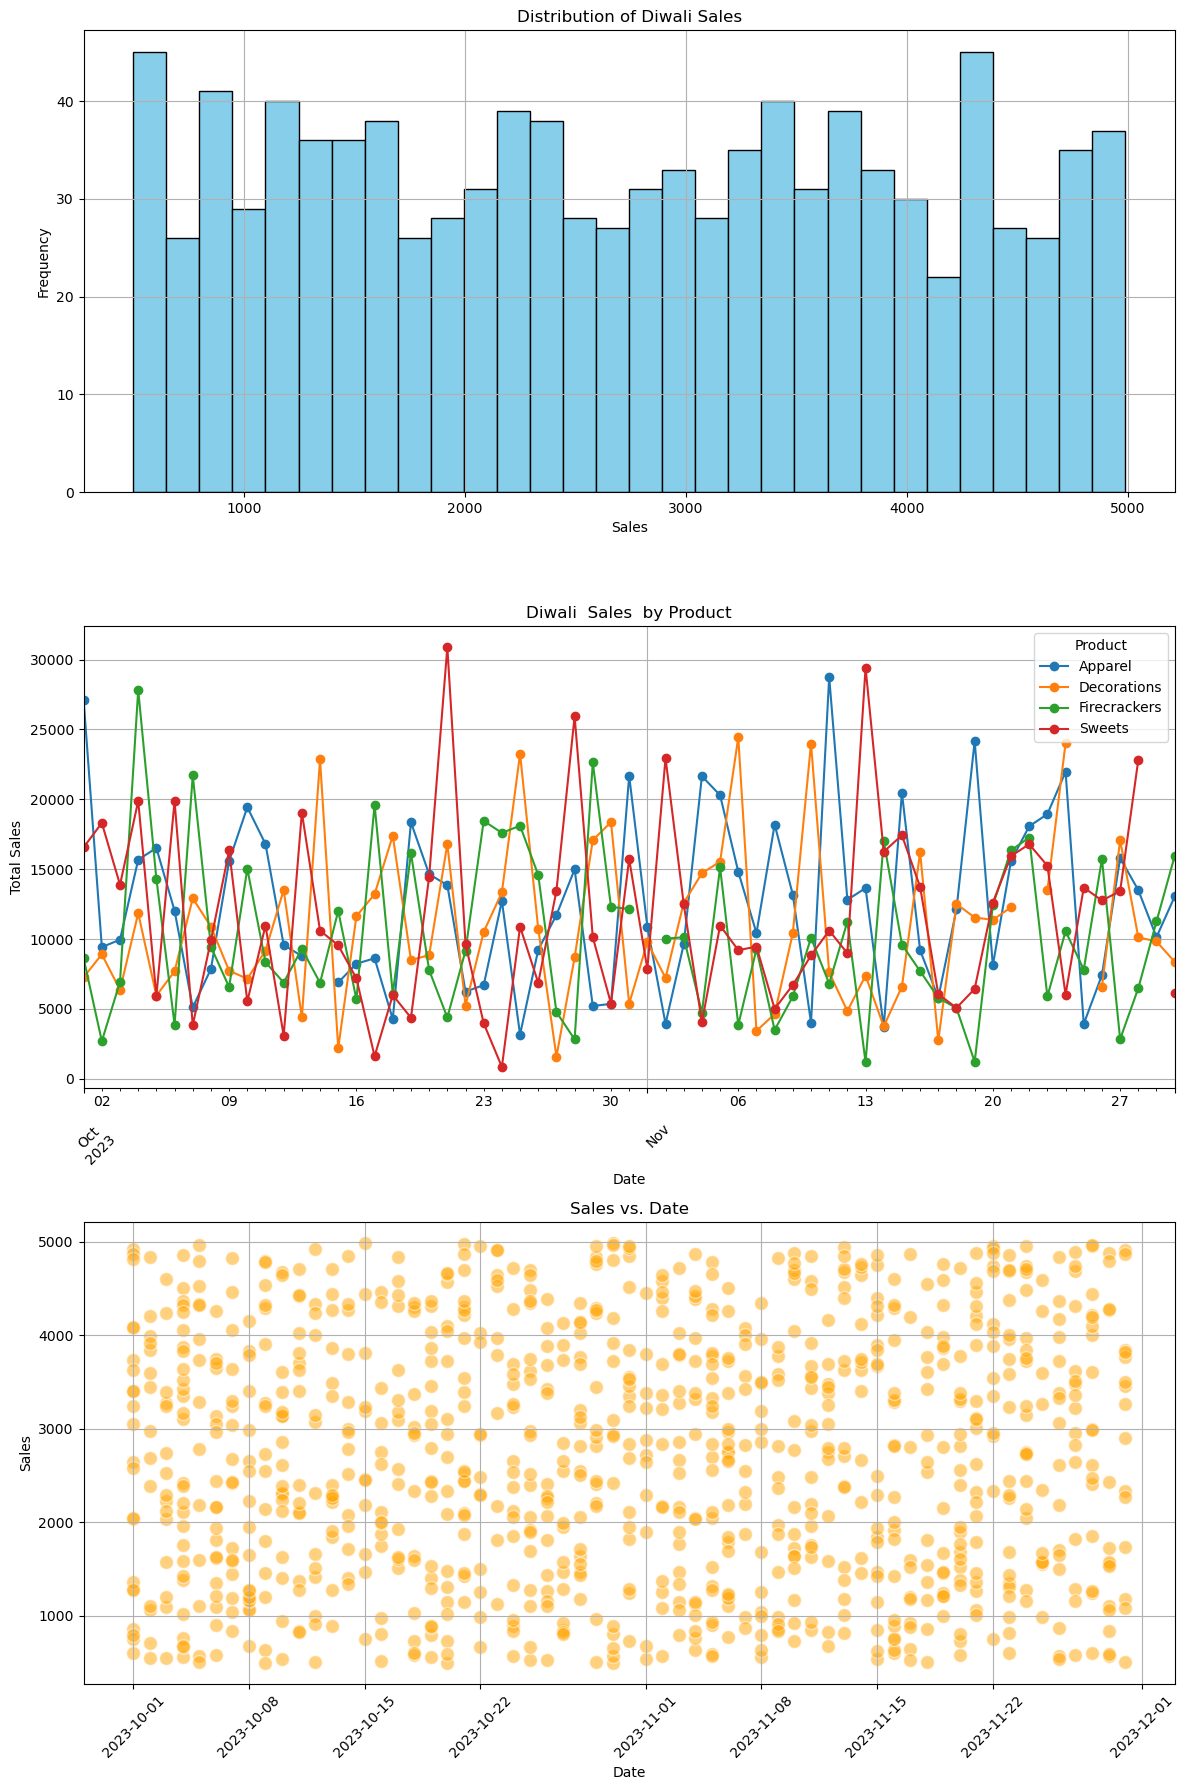

In [13]:
#Q10.Histogram chart, line chart and scatter chart in the SUBPLOT CHART
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Histogram
axs[0].hist(data['Sales'], bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Diwali Sales')
axs[0].set_xlabel('Sales')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Line Chart
sales_by_date_product = data.groupby(['Date', 'Product'])['Sales'].sum().unstack()
sales_by_date_product.plot(kind='line', marker='o', ax=axs[1])
axs[1].set_title('Diwali  Sales  by Product')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Total Sales')
axs[1].grid(True)
axs[1].tick_params(axis='x', rotation=45)

# Scatter Chart
axs[2].scatter(data['Date'], data['Sales'], alpha=0.5, c='orange', edgecolors='w', s=100)
axs[2].set_title('Sales vs. Date')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Sales')
axs[2].grid(True)
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


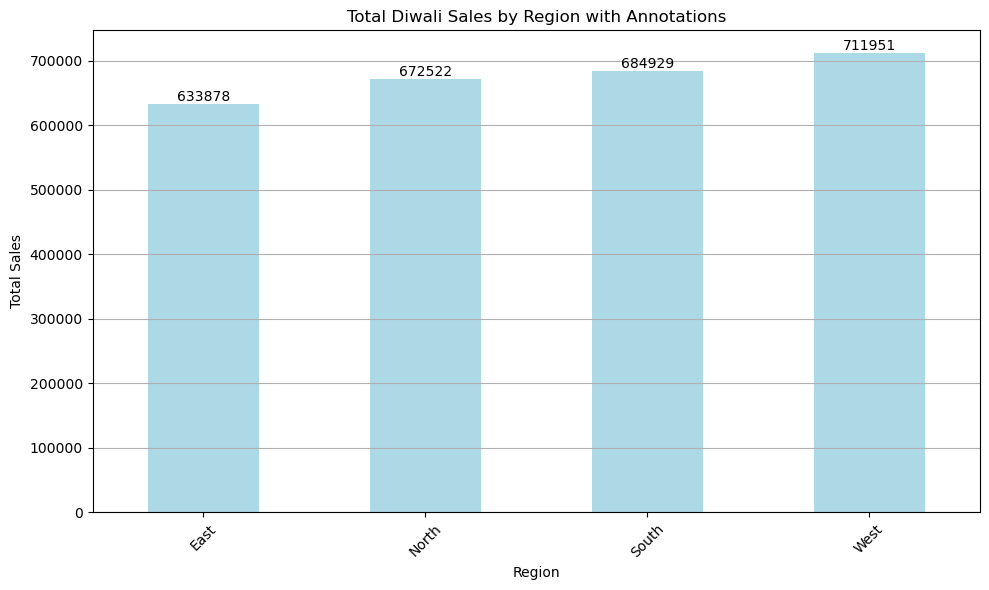

In [14]:
#Q11.Total Diwali Sales by Region with Annotations(TEXT PLOT)
plt.figure(figsize=(10, 6))
sales_by_region = data.groupby('Region')['Sales'].sum()
bars = sales_by_region.plot(kind='bar', color='lightblue')

# Adding text annotations
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2.0, height,
        f'{height:.0f}',
        ha='center', va='bottom'
    )

plt.title('Total Diwali Sales by Region with Annotations')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

